In [14]:
# imports & constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, roc_auc_score, precision_recall_curve, auc,
                             confusion_matrix, ConfusionMatrixDisplay)
import joblib

# Optional imports (if using XGBoost)
try:
    import xgboost as xgb
    has_xgb = True
except Exception:
    has_xgb = False

RANDOM_STATE = 42
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


In [15]:
# load dataset and overview
df = pd.read_csv('data without infertility _final.csv')
print("Initial shape:", df.shape)
display(df.head())
print("\nDtypes:\n", df.dtypes)
print("\nColumns with null counts:")
display(df.isna().sum().sort_values(ascending=False).head(30))


Initial shape: (541, 43)


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 42
0,1,10001,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,7.0,0,0,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,10002,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,11.0,1,0,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,10003,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,10.0,1,0,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,10004,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,4.0,0,0,8.06,2.36,3.415254,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,10005,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,1.0,1,0,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN



Dtypes:
 Sl. No                     int64
Patient File No.           int64
PCOS (Y/N)                 int64
 Age (yrs)                 int64
Weight (Kg)              float64
Height(Cm)               float64
BMI                      float64
Blood Group                int64
Pulse rate(bpm)            int64
RR (breaths/min)           int64
Hb(g/dl)                 float64
Cycle(R/I)                 int64
Cycle length(days)         int64
Marraige Status (Yrs)    float64
Pregnant(Y/N)              int64
No. of aborptions          int64
FSH(mIU/mL)              float64
LH(mIU/mL)               float64
FSH/LH                   float64
Hip(inch)                  int64
Waist(inch)                int64
Waist:Hip Ratio          float64
TSH (mIU/L)              float64
AMH(ng/mL)                object
PRL(ng/mL)               float64
Vit D3 (ng/mL)           float64
PRG(ng/mL)               float64
RBS(mg/dl)               float64
Weight gain(Y/N)           int64
hair growth(Y/N)           int64


Unnamed: 42              539
Marraige Status (Yrs)      1
Fast food (Y/N)            1
 Age (yrs)                 0
Weight (Kg)                0
Height(Cm)                 0
BMI                        0
Blood Group                0
Sl. No                     0
Patient File No.           0
PCOS (Y/N)                 0
Hb(g/dl)                   0
RR (breaths/min)           0
Pulse rate(bpm)            0
Cycle(R/I)                 0
No. of aborptions          0
FSH(mIU/mL)                0
Cycle length(days)         0
Pregnant(Y/N)              0
Hip(inch)                  0
Waist(inch)                0
Waist:Hip Ratio            0
TSH (mIU/L)                0
AMH(ng/mL)                 0
PRL(ng/mL)                 0
LH(mIU/mL)                 0
FSH/LH                     0
PRG(ng/mL)                 0
Vit D3 (ng/mL)             0
hair growth(Y/N)           0
dtype: int64

In [16]:
# basic cleaning
df = df.copy()

# Drop useless columns (if present)
df = df.drop(columns=['Unnamed: 42'], errors='ignore')

# Trim string columns
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].astype(str).str.strip()

# Fix 'Fast food (Y/N)' floats -> int (fill NaN with 0)
if 'Fast food (Y/N)' in df.columns:
    df['Fast food (Y/N)'] = df['Fast food (Y/N)'].fillna(0).astype(int)

# If target is 'PCOS (Y/N)' as strings, convert to int
if df['PCOS (Y/N)'].dtype == 'object':
    df['PCOS (Y/N)'] = df['PCOS (Y/N)'].replace({'Y':1, 'N':0}).astype(int)

print("After basic cleaning shape:", df.shape)
df.head()


After basic cleaning shape: (541, 42)


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,10001,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,7.0,0,0,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1,0,110,80,3,3,18.0,18.0,8.5
1,2,10002,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,11.0,1,0,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0,0,120,70,3,5,15.0,14.0,3.7
2,3,10003,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,10.0,1,0,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1,0,120,80,13,15,18.0,20.0,10.0
3,4,10004,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,4.0,0,0,8.06,2.36,3.415254,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0,0,120,70,2,2,15.0,14.0,7.5
4,5,10005,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,1.0,1,0,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0,0,120,80,3,4,16.0,14.0,7.0


In [17]:
# missingness summary
missing = df.isna().sum().sort_values(ascending=False)
missing_percent = (missing / len(df) * 100).round(2)
pd.DataFrame({'missing_count': missing, 'missing_pct': missing_percent}).head(30)


,missing_count,missing_pct
Marraige Status (Yrs),1,0.18
Sl. No,0,0.00
PCOS (Y/N),0,0.00
Age (yrs),0,0.00
Weight (Kg),0,0.00
Height(Cm),0,0.00
BMI,0,0.00
Blood Group,0,0.00
Pulse rate(bpm),0,0.00
Patient File No.,0,0.00


In [18]:
# explicit selection of useful columns
# We'll keep medical, ultrasound, hormone and key lifestyle features and drop identifiers
drop_candidates = ['Sl. No', 'Patient File No.']
for c in drop_candidates:
    if c in df.columns:
        df = df.drop(columns=[c])

# Automatically drop columns with >50% missing (if any) — inspect before large drops
high_missing = df.columns[df.isna().mean() > 0.5].tolist()
print("High missing (>50%) columns:", high_missing)


# Show remaining columns
print("Remaining columns:", df.columns.tolist())


High missing (>50%) columns: []
Remaining columns: ['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']


In [19]:
# Feature typing and simple derived features
# Ensure target and numeric columns are correct
target = 'PCOS (Y/N)'

# Create BMI if not exact or recalc check 
# Create waist-hip ratio if both exist
if ('Waist' in df.columns) and ('Hip' in df.columns):
    df['WHR'] = df['Waist'] / df['Hip']

# Example: menstrual cycle length may be numeric named 'Cycle (days)' etc. keep as-is
# Make a small symptoms_count from available binary symptom columns (if present)
symptom_cols = [c for c in df.columns if c.lower().strip() in 
                ['weight gain(y/n)','hair growth(y/n)','skin darkening (y/n)','hair loss(y/n)','pimples(y/n)']]
# but to be robust, pick known names if they exist:
possible_symptoms = ['Weight gain(Y/N)','weight gain(Y/N)','Weight gain','weight gain(Y/N)']
symptom_cols = [c for c in df.columns if any(k.lower() in c.lower() for k in ['weight gain','hair growth','skin darkening','hair loss','pimples'])]
symptom_cols = [c for c in symptom_cols if df[c].dropna().isin([0,1]).all() or df[c].dtype in [np.int64, np.int32, 'int64']]
symptom_cols = list(dict.fromkeys(symptom_cols))  # unique preserve order
print("Detected symptom columns:", symptom_cols)

if len(symptom_cols)>0:
    df['symptom_count'] = df[symptom_cols].sum(axis=1)

# Quick view
display(df[[target,'symptom_count']].head())


Detected symptom columns: ['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)']


,PCOS (Y/N),symptom_count
0,0,0
1,0,0
2,1,2
3,0,0
4,0,1


Target distribution:


PCOS (Y/N)
0    0.672828
1    0.327172
Name: proportion, dtype: float64


Numeric columns count: 39


,count,mean,std,min,25%,50%,75%,max
Age (yrs),541.0,31.430684,5.411006,20.000000,28.000000,31.000000,35.000000,48.000000
Weight (Kg),541.0,59.637153,11.028287,31.000000,52.000000,59.000000,65.000000,108.000000
Height(Cm),541.0,156.484835,6.033545,137.000000,152.000000,156.000000,160.000000,180.000000
BMI,541.0,24.311285,4.056399,12.417882,21.641274,24.238227,26.634958,38.900000
Blood Group,541.0,13.802218,1.840812,11.000000,13.000000,14.000000,15.000000,18.000000
Pulse rate(bpm),541.0,73.247689,4.430285,13.000000,72.000000,72.000000,74.000000,82.000000
RR (breaths/min),541.0,19.243993,1.688629,16.000000,18.000000,18.000000,20.000000,28.000000
Hb(g/dl),541.0,11.160037,0.866904,8.500000,10.500000,11.000000,11.700000,14.800000
Cycle(R/I),541.0,2.560074,0.901950,2.000000,2.000000,2.000000,4.000000,5.000000
Cycle length(days),541.0,4.940850,1.492020,0.000000,4.000000,5.000000,5.000000,12.000000


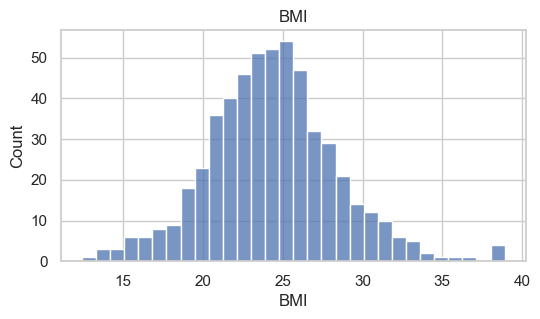

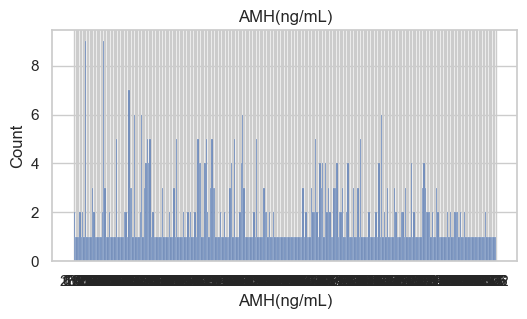

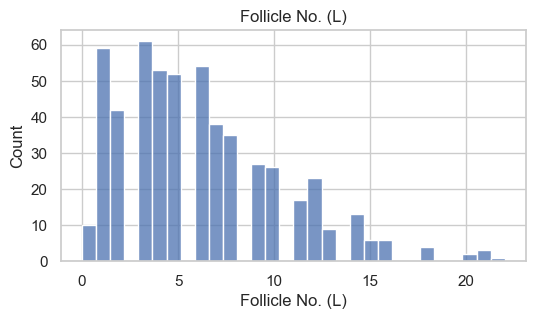

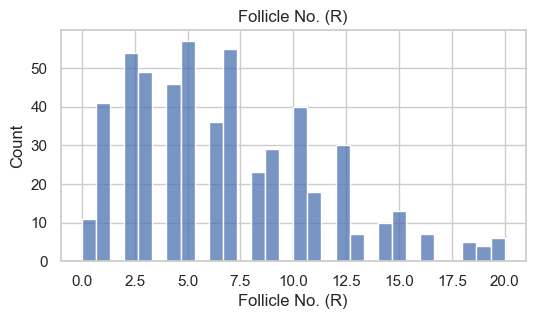

In [20]:
# EDA - target distribution and numeric summaries
print("Target distribution:")
display(df[target].value_counts(normalize=True).rename('proportion'))

num_cols = df.select_dtypes(include=[np.number]).columns.drop(target).tolist()
print("\nNumeric columns count:", len(num_cols))
display(df[num_cols].describe().T)

# Histograms for key numeric columns (age, BMI, AMH if exists, Follicle counts)
plot_cols = [c for c in ['Age (yrs)','BMI','AMH(ng/mL)','Follicle No. (L)','Follicle No. (R)'] if c in df.columns]
for c in plot_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[c].dropna(), kde=False, bins=30)
    plt.title(c)
    plt.show()


Categorical / low-card cols: ['Blood Group', 'RR (breaths/min)', 'Cycle(R/I)', 'Pregnant(Y/N)', 'No. of aborptions', 'AMH(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'symptom_count']


<Figure size 600x300 with 0 Axes>

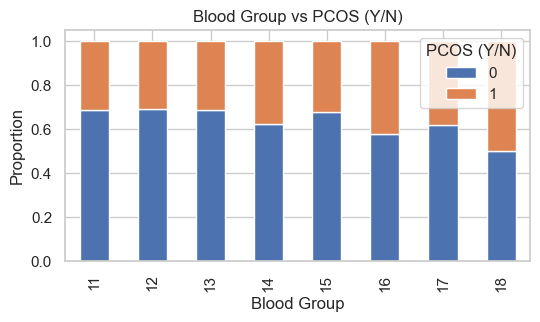

<Figure size 600x300 with 0 Axes>

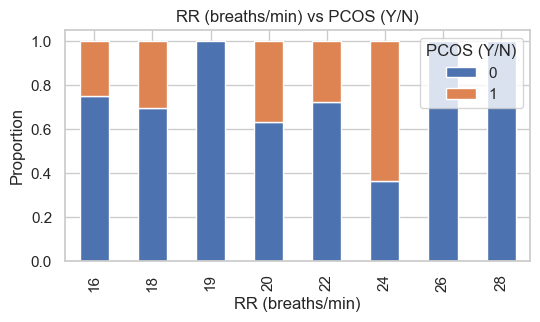

<Figure size 600x300 with 0 Axes>

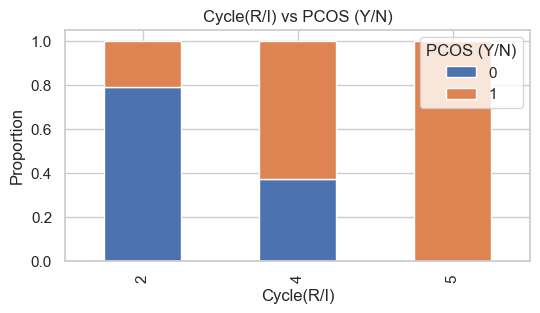

<Figure size 600x300 with 0 Axes>

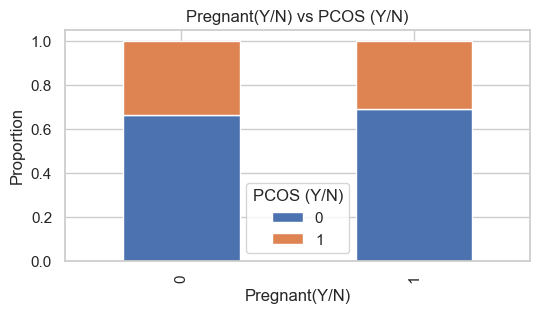

<Figure size 600x300 with 0 Axes>

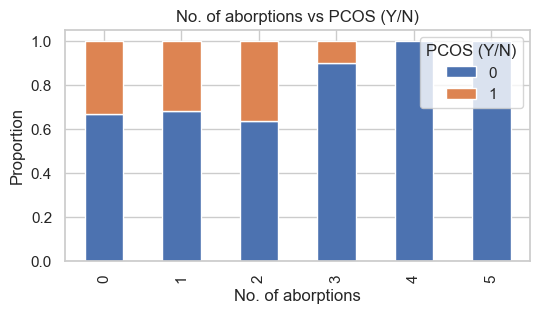

<Figure size 600x300 with 0 Axes>

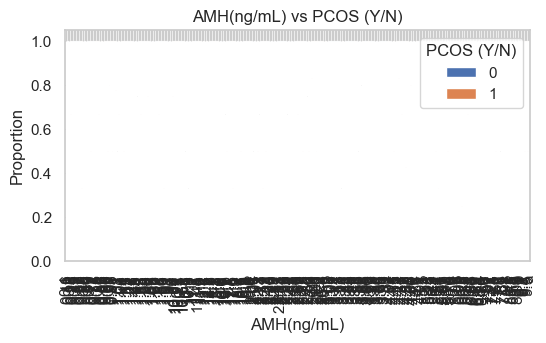

<Figure size 600x300 with 0 Axes>

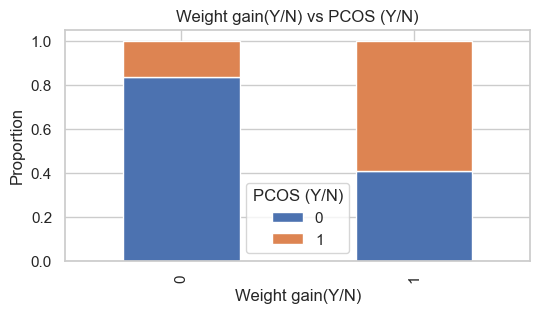

<Figure size 600x300 with 0 Axes>

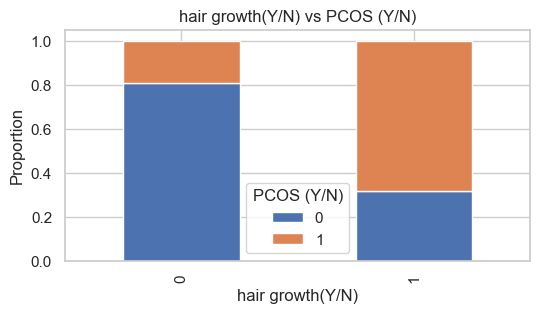

<Figure size 600x300 with 0 Axes>

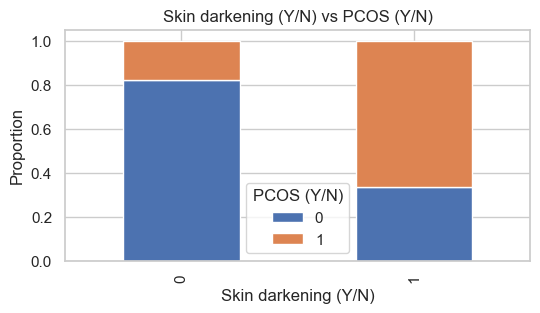

<Figure size 600x300 with 0 Axes>

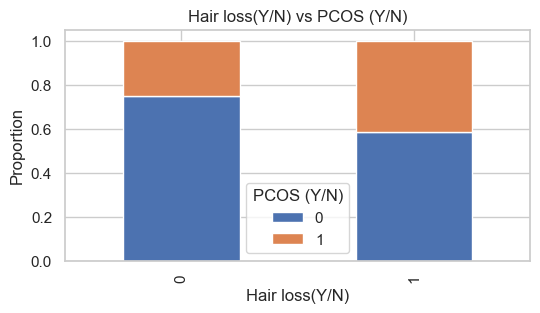

<Figure size 600x300 with 0 Axes>

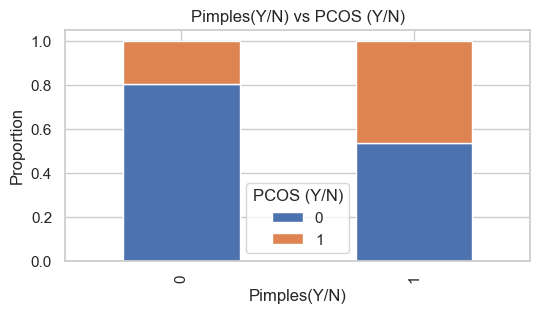

<Figure size 600x300 with 0 Axes>

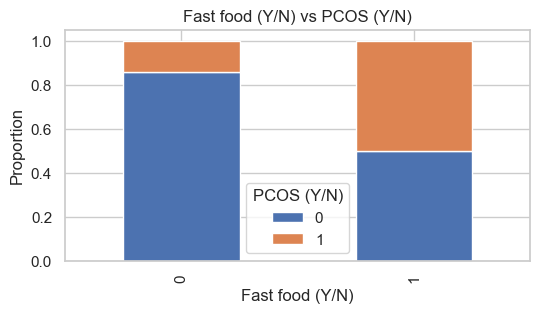

<Figure size 600x300 with 0 Axes>

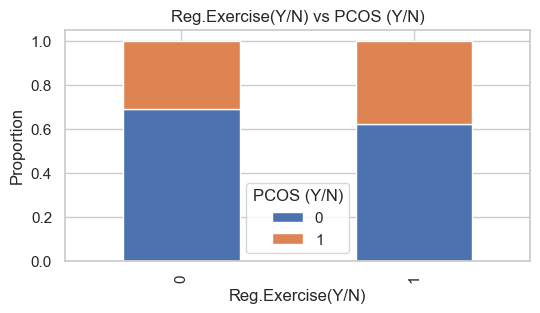

<Figure size 600x300 with 0 Axes>

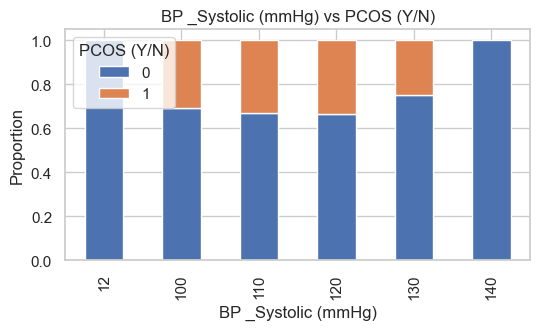

<Figure size 600x300 with 0 Axes>

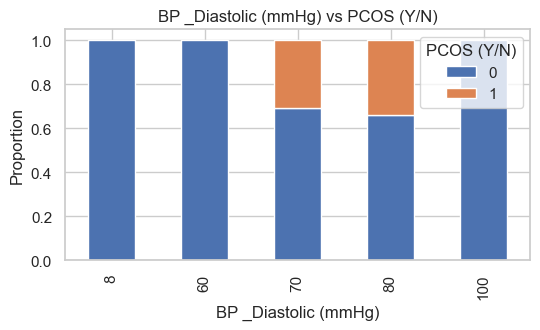

<Figure size 600x300 with 0 Axes>

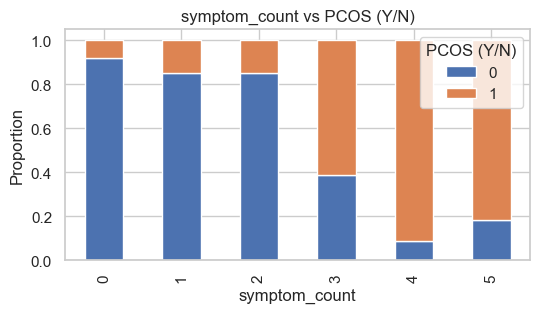

In [21]:
# categorical vs target comparison
cat_cols = [c for c in df.columns if df[c].dtype == 'object' or df[c].nunique()<=10]
cat_cols = [c for c in cat_cols if c != target]
print("Categorical / low-card cols:", cat_cols)

for c in cat_cols:
    plt.figure(figsize=(6,3))
    tab = pd.crosstab(df[c], df[target], normalize='index')
    tab.plot(kind='bar', stacked=True, figsize=(6,3))
    plt.title(f"{c} vs {target}")
    plt.ylabel('Proportion')
    plt.show()


In [22]:
print(df.columns.tolist())


['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)', 'symptom_count']


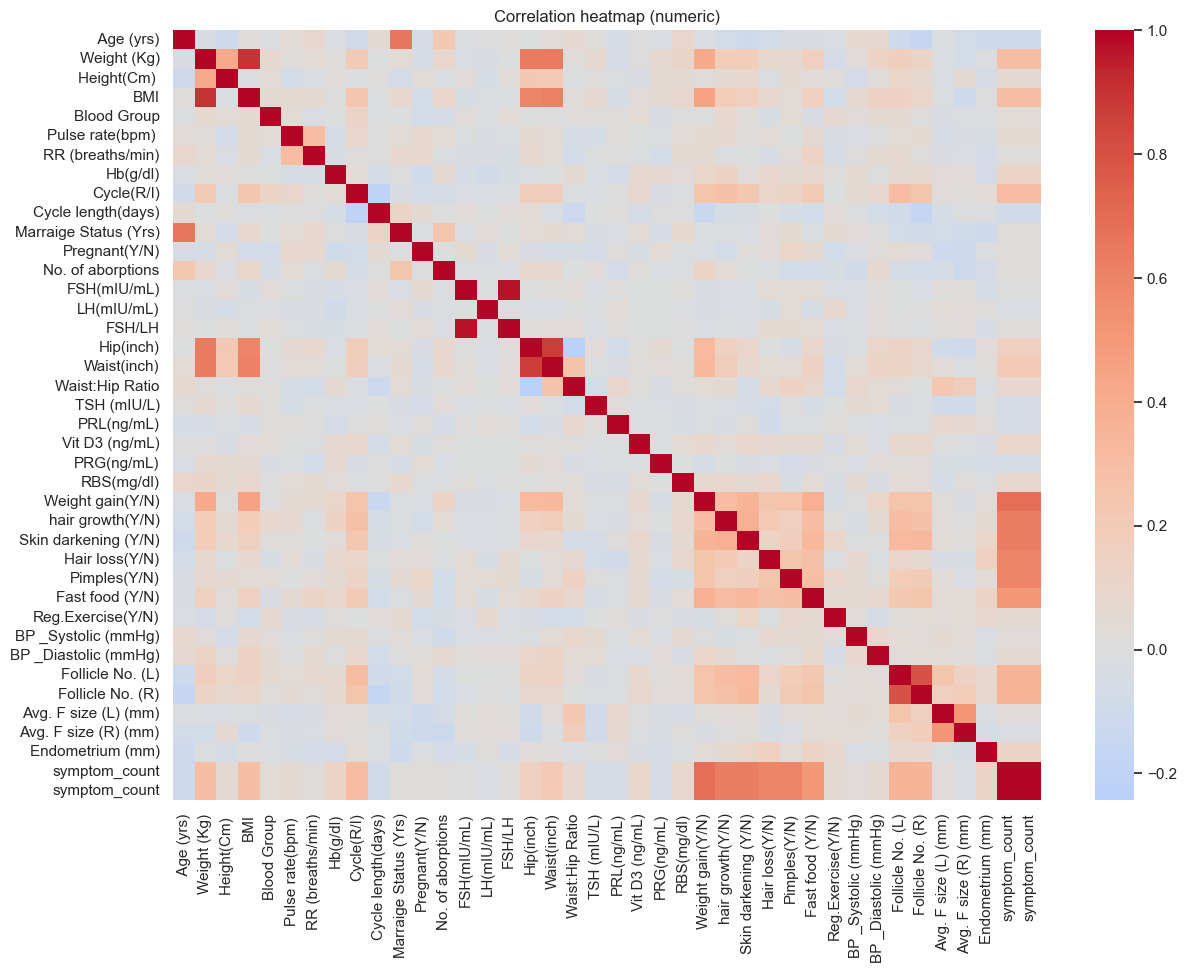

In [23]:
# correlation heatmap for numeric
plt.figure(figsize=(14,10))
corr = df[num_cols + (['symptom_count'] if 'symptom_count' in df.columns else [])].corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation heatmap (numeric)')
plt.show()


In [24]:
# Define feature lists for preprocessing

# 1. numeric features = all numeric columns except the target
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
if target in numeric_features:
    numeric_features.remove(target)

# 2. categorical features = any remaining non-numeric columns (if any)
categorical_features = [c for c in df.columns if c not in numeric_features + [target]]

print("Numeric feature count:", len(numeric_features))
print("Categorical feature count:", len(categorical_features))
print("Numeric sample:", numeric_features[:10])
print("Categorical:", categorical_features)


Numeric feature count: 39
Categorical feature count: 1
Numeric sample: [' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)']
Categorical: ['AMH(ng/mL)']


In [25]:
# preprocessing pipeline
num_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numeric_features),
    ('cat', cat_transformer, categorical_features)
], remainder='drop', verbose_feature_names_out=False)

# Quick dry run fit
preprocessor.fit(df.drop(columns=[target]))
print("Preprocessor fitted. Output feature count:", len(preprocessor.get_feature_names_out()))


Preprocessor fitted. Output feature count: 340


In [26]:
# train/test split
X = df.drop(columns=[target])
y = df[target].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE)
print("Train/test shapes:", X_train.shape, X_test.shape)
print("Train target distribution:\n", y_train.value_counts(normalize=True))


Train/test shapes: (432, 40) (109, 40)
Train target distribution:
 PCOS (Y/N)
0    0.673611
1    0.326389
Name: proportion, dtype: float64


In [27]:
# baseline models with cross-validation
# Logistic Regression pipeline
lr_pipe = Pipeline([('pre', preprocessor),
                    ('clf', LogisticRegression(max_iter=2000, class_weight='balanced', random_state=RANDOM_STATE))])

# Random Forest pipeline
rf_pipe = Pipeline([('pre', preprocessor),
                    ('clf', RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=RANDOM_STATE, n_jobs=-1))])

models = {'LogisticRegression': lr_pipe, 'RandomForest': rf_pipe}

if has_xgb:
    xgb_pipe = Pipeline([('pre', preprocessor),
                         ('clf', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE))])
    models['XGBoost'] = xgb_pipe

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scoring = ['roc_auc','precision','recall','f1']

results = {}
for name, model in models.items():
    print("Training CV for", name)
    res = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    results[name] = {k: v.mean() for k,v in res.items()}
    print(name, results[name])


Training CV for LogisticRegression
LogisticRegression {'fit_time': np.float64(0.018004846572875977), 'score_time': np.float64(0.011705255508422852), 'test_roc_auc': np.float64(0.944276098153645), 'test_precision': np.float64(0.7923248053392659), 'test_recall': np.float64(0.8652709359605911), 'test_f1': np.float64(0.8259225650332729)}
Training CV for RandomForest
RandomForest {'fit_time': np.float64(0.3046689510345459), 'score_time': np.float64(0.08688368797302246), 'test_roc_auc': np.float64(0.9563655051492372), 'test_precision': np.float64(0.9339153439153438), 'test_recall': np.float64(0.7024630541871921), 'test_f1': np.float64(0.7974444444444444)}
Training CV for XGBoost
XGBoost {'fit_time': np.float64(1.3911295890808106), 'score_time': np.float64(0.014895343780517578), 'test_roc_auc': np.float64(0.9385123930061352), 'test_precision': np.float64(0.8034007038712921), 'test_recall': np.float64(0.7881773399014778), 'test_f1': np.float64(0.7932780343796778)}


Classification report (test):
              precision    recall  f1-score   support

           0     0.8987    0.9726    0.9342        73
           1     0.9333    0.7778    0.8485        36

    accuracy                         0.9083       109
   macro avg     0.9160    0.8752    0.8913       109
weighted avg     0.9102    0.9083    0.9059       109

ROC-AUC (test): 0.9427321156773212


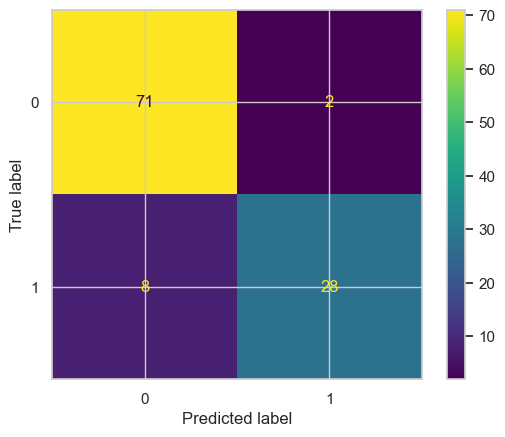

In [28]:
# choose the best model (example uses RandomForest) and evaluate
best_model = rf_pipe  # if RandomForest showed best CV performance, else set accordingly
best_model.fit(X_train, y_train)

# Predict & metrics
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]

print("Classification report (test):")
print(classification_report(y_test, y_pred, digits=4))
print("ROC-AUC (test):", roc_auc_score(y_test, y_prob))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


PR-AUC: 0.9253058340301411


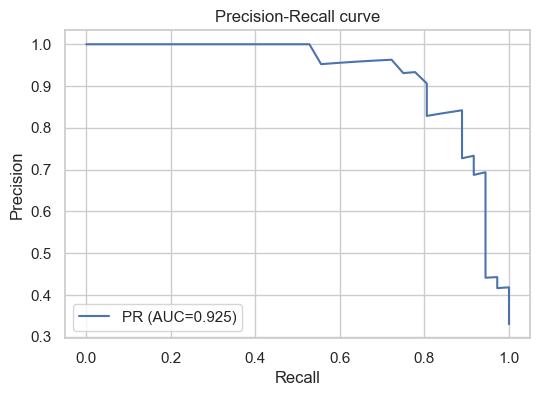

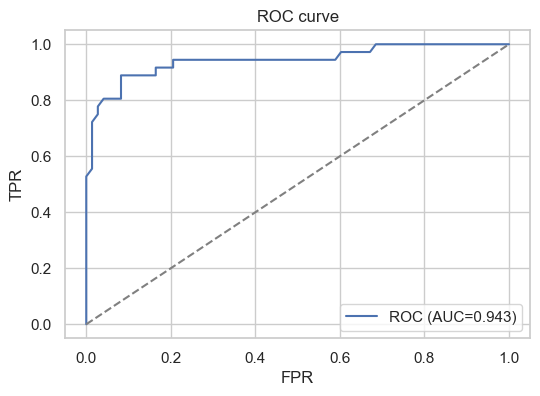

In [29]:
# PR and ROC curves
prec, rec, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec, prec)
print("PR-AUC:", pr_auc)

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR (AUC={pr_auc:.3f})')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall curve')
plt.legend(); plt.grid(True); plt.show()

# ROC
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC (AUC={roc_auc_score(y_test,y_prob):.3f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC curve')
plt.legend(); plt.grid(True); plt.show()


In [30]:
#  permutation importance (model-agnostic)
from sklearn.inspection import permutation_importance
res = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, n_jobs=-1)
feature_names = preprocessor.get_feature_names_out()
imp_idx = np.argsort(res.importances_mean)[::-1]
print("Top 20 features by permutation importance:")
for i in imp_idx[:20]:
    print(f"{feature_names[i]} -> mean_imp={res.importances_mean[i]:.4f} std={res.importances_std[i]:.4f}")

# SHAP (if tree model available)
if hasattr(best_model.named_steps['clf'], '__class__') and (isinstance(best_model.named_steps['clf'], RandomForestClassifier) or has_xgb):
    try:
        import shap
        # Create matrix for SHAP (transform X_test through preprocessor)
        X_test_trans = preprocessor.transform(X_test)
        # get feature names for transformed matrix
        transformed_feature_names = preprocessor.get_feature_names_out()
        if has_xgb and isinstance(best_model.named_steps['clf'], xgb.XGBClassifier):
            explainer = shap.TreeExplainer(best_model.named_steps['clf'])
            shap_values = explainer.shap_values(X_test_trans)
        else:
            explainer = shap.TreeExplainer(best_model.named_steps['clf'])
            shap_values = explainer.shap_values(X_test_trans)
        shap.summary_plot(shap_values, X_test_trans, feature_names=transformed_feature_names, show=True)
    except Exception as e:
        print("SHAP failed:", e)


Top 20 features by permutation importance:
Avg. F size (L) (mm) -> mean_imp=0.0606 std=0.0117
Follicle No. (R) -> mean_imp=0.0468 std=0.0171
AMH(ng/mL)_0.1 -> mean_imp=0.0275 std=0.0192
Cycle(R/I) -> mean_imp=0.0128 std=0.0073
Fast food (Y/N) -> mean_imp=0.0119 std=0.0059
hair growth(Y/N) -> mean_imp=0.0073 std=0.0069
Endometrium (mm) -> mean_imp=0.0055 std=0.0084
Skin darkening (Y/N) -> mean_imp=0.0046 std=0.0074
Weight gain(Y/N) -> mean_imp=0.0046 std=0.0046
Reg.Exercise(Y/N) -> mean_imp=0.0046 std=0.0094
LH(mIU/mL) -> mean_imp=0.0037 std=0.0045
Pimples(Y/N) -> mean_imp=0.0037 std=0.0045
No. of aborptions -> mean_imp=0.0018 std=0.0037
FSH(mIU/mL) -> mean_imp=0.0009 std=0.0064
Avg. F size (R) (mm) -> mean_imp=0.0009 std=0.0028
BP _Diastolic (mmHg) -> mean_imp=0.0009 std=0.0028
Hip(inch) -> mean_imp=0.0009 std=0.0028
symptom_count -> mean_imp=0.0009 std=0.0064
 Age (yrs) -> mean_imp=0.0009 std=0.0076
Follicle No. (L) -> mean_imp=0.0000 std=0.0000
SHAP failed: No module named 'shap'


In [31]:
# hyperparameter tuning for RandomForest (quick randomized search)
param_dist = {
    'clf__n_estimators': [200, 400, 600],
    'clf__max_depth': [None, 10, 20, 35],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__class_weight': ['balanced', None]
}
rs = RandomizedSearchCV(rf_pipe, param_distributions=param_dist, n_iter=20, scoring='roc_auc', 
                        cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=RANDOM_STATE),
                        random_state=RANDOM_STATE, n_jobs=-1, verbose=2)
rs.fit(X_train, y_train)
print("Best params:", rs.best_params_)
print("Best CV ROC-AUC:", rs.best_score_)
best_rf = rs.best_estimator_


Fitting 4 folds for each of 20 candidates, totalling 80 fits
Best params: {'clf__n_estimators': 200, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 1, 'clf__max_depth': 10, 'clf__class_weight': None}
Best CV ROC-AUC: 0.9560846183349039


In [32]:
# Save the final model pipeline (best_rf if tuned, else best_model)
final_model = best_rf if 'best_rf' in globals() else best_model
joblib.dump(final_model, 'pcos_final_pipeline.joblib')
print("Saved final pipeline to /mnt/data/pcos_final_pipeline.joblib")


Saved final pipeline to /mnt/data/pcos_final_pipeline.joblib


In [33]:
import joblib, json
# X is the DataFrame used to train (X = df.drop([target], axis=1))
joblib.dump(final_model, 'pcos_final_pipeline.joblib')
joblib.dump(X.columns.tolist(), 'feature_columns.joblib')

# or save as json
with open('feature_columns.json','w') as f:
    json.dump(X.columns.tolist(), f)
